In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [41]:
df = pd.read_csv("login_hours.csv")
df = df.sort_values(by=['car_number','active_date'],ascending=[True,True])
df = df[df.category == "auto"]

In [42]:
df = df[df.active_date>='2018-11-05']

In [43]:
number_of_days = df["car_number"].value_counts()
number_of_days = number_of_days.sort_index()
total_login_hours = df.groupby(["car_number"])["login_hours"].sum()
total_login_hours = total_login_hours.sort_index()

In [44]:
df1 = pd.concat([number_of_days,total_login_hours],axis=1)
df1.columns = ['number_of_days', 'total_login_hours']

In [45]:
df1["login_hours_per_day"] = df1["total_login_hours"]/df1["number_of_days"]
df1["number_of_days/24"] = df1["number_of_days"]/28

In [46]:
df1.describe()

,number_of_days,total_login_hours,login_hours_per_day,number_of_days/24
count,15417.000000,15417.000000,15417.000000,15417.000000
mean,15.862360,93.852074,5.125757,0.566513
std,8.276676,76.309350,2.898473,0.295596
min,1.000000,0.004167,0.004167,0.035714
25%,9.000000,28.959167,2.926265,0.321429
50%,17.000000,80.137778,5.087389,0.607143
75%,23.000000,143.974722,7.175428,0.821429
max,28.000000,485.620278,17.343581,1.000000


In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df1)
scaled_features = scaler.transform(df1)
df_feat = pd.DataFrame(scaled_features,columns=df1.columns)
df_feat.head()

,number_of_days,total_login_hours,login_hours_per_day,number_of_days/24
0,1.104059,0.054628,-0.415727,1.104059
1,-1.312449,-1.116295,-1.170149,-1.312449
2,1.104059,0.849026,0.420852,1.104059
3,1.466535,0.724809,0.069482,1.466535
4,0.862408,-0.182310,-0.569311,0.862408


In [48]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_feat.values)
df_feat["labels"] = kmeans.labels_

2    6068
1    5134
0    4215
Name: labels, dtype: int64

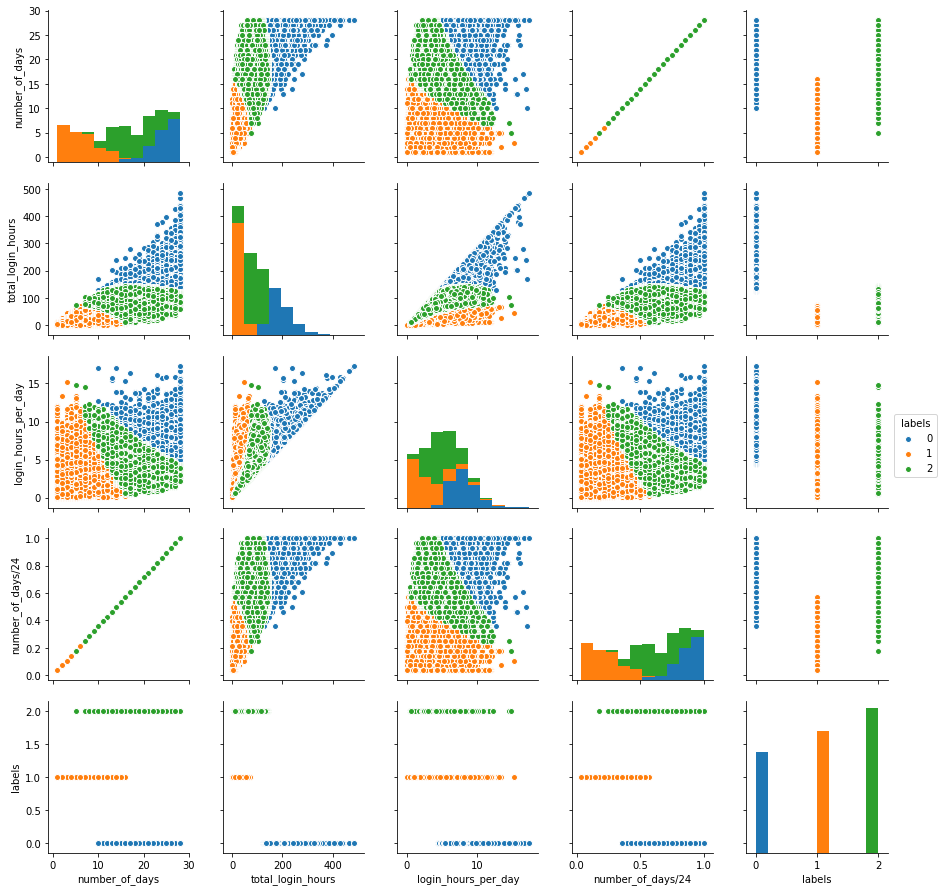

In [49]:
df1["labels"] = kmeans.labels_
sns.pairplot(df1,hue="labels")
print("\n")
df1["labels"].value_counts()

In [50]:
temp_df = pd.read_csv("login_hours.csv")
temp_df = temp_df.sort_values(by=['car_number','active_date'],ascending=[True,True])
temp_df = temp_df[temp_df.category == "auto"]

In [51]:
temp_df = temp_df[temp_df.wk == 44]

In [52]:
t_number_of_days = temp_df["car_number"].value_counts()
t_number_of_days = t_number_of_days.sort_index()
t_total_login_hours = temp_df.groupby(["car_number"])["login_hours"].sum()
t_total_login_hours = t_total_login_hours.sort_index()

In [53]:
tdf1 = pd.concat([t_number_of_days,t_total_login_hours],axis=1)
tdf1.columns = ['number_of_days', 'total_login_hours']
tdf1["attendancep"] = tdf1["number_of_days"]/7
tdf1["login_hours_per_day"] = tdf1["total_login_hours"]/tdf1["number_of_days"]
tdf1.describe()

,number_of_days,total_login_hours,attendancep,login_hours_per_day
count,13379.000000,13379.000000,13379.000000,13379.000000
mean,4.984677,29.468553,0.712097,5.276411
std,1.952950,22.594832,0.278993,3.320202
min,1.000000,0.008889,0.142857,0.008889
25%,4.000000,10.349444,0.571429,2.649911
50%,6.000000,26.102500,0.857143,5.110764
75%,7.000000,44.817083,1.000000,7.646503
max,7.000000,142.100000,1.000000,22.958102


In [67]:
cluster1df = df1[df1.labels == 1]
cluster2df = df1[df1.labels == 2]
cluster3df = df1[df1.labels == 0]

In [68]:
ptdf = tdf1.loc[cluster1df.index.values]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


In [69]:
atdf = tdf1.loc[cluster2df.index.values]
ftdf = tdf1.loc[cluster3df.index.values]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


In [70]:
ptdf.describe()

,number_of_days,total_login_hours,attendancep,login_hours_per_day
count,3402.000000,3402.000000,3402.000000,3402.000000
mean,3.786302,14.991988,0.540900,3.325852
std,1.961527,16.136527,0.280218,2.852072
min,1.000000,0.008889,0.142857,0.008889
25%,2.000000,2.178750,0.285714,0.937882
50%,4.000000,9.577778,0.571429,2.649271
75%,5.000000,22.596181,0.714286,5.029056
max,7.000000,95.024167,1.000000,16.714861


In [71]:
atdf.describe()

,number_of_days,total_login_hours,attendancep,login_hours_per_day
count,5356.000000,5356.000000,5356.000000,5356.000000
mean,5.248320,26.584569,0.749760,4.847615
std,1.681765,17.117494,0.240252,2.652365
min,1.000000,0.009722,0.142857,0.009722
25%,4.000000,13.632986,0.571429,2.914865
50%,6.000000,24.450417,0.857143,4.624000
75%,7.000000,37.293125,1.000000,6.562917
max,7.000000,98.526111,1.000000,15.545417


In [72]:
ftdf.describe()

,number_of_days,total_login_hours,attendancep,login_hours_per_day
count,4009.000000,4009.000000,4009.000000,4009.000000
mean,6.037665,48.730102,0.862524,7.904890
std,1.364406,20.908419,0.194915,2.768734
min,1.000000,0.013611,0.142857,0.013611
25%,5.000000,35.111944,0.714286,6.154960
50%,7.000000,48.343333,1.000000,7.864611
75%,7.000000,61.905556,1.000000,9.582063
max,7.000000,142.100000,1.000000,20.300000


In [73]:
3402/5134

0.662641215426568

In [74]:
5356/6068

0.8826631509558339

In [75]:
4009/4215

0.9511269276393831